In [83]:
# Import relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# The data file from UCI is in the .data format.
import pandas as pd
import re
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings

warnings.simplefilter("ignore", category=UserWarning)

%matplotlib inline

In [ ]:
"""Load data"""

In [84]:
# Create a list for all of the variable names to extract from the spambase.names text file.
list_of_variables = []

# Open the spambase.names text file.
with open("spambase.names") as f:
    text_contents = f.readlines()
    str_of_contents = "".join(text_contents)

    # Use regex to extract the variable names.
    compiled_variable_re = re.compile(
        r"((spam, non-spam classes)|(^(word_|char_|capital_)[A-Za-z_0-9\[\]\(\)!$#;]+)[^:])",
        flags=re.MULTILINE,
    )
    list_of_variables = compiled_variable_re.findall(str_of_contents)

# The spam/non-spam identifier is the final variable, not the first
spam_var = list_of_variables.pop(0)
list_of_variables.append(spam_var)

# More information was collected with the regex than needed.
# Only the first value from each tuple is of interest. Update the list of variable names.
for i, var_tuple in enumerate(list_of_variables):
    list_of_variables[i] = var_tuple[0]
print(list_of_variables)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capita

In [ ]:
"""Convert to Pandas dataframe"""

In [85]:
# Create a pandas dataframe with the variable names as column names.

# Populate the spam dataframe with the data from the spambase.data file.
# This is a .data file. However, pandas' read_csv function extracts the data correctly.
spam_email_df = pd.read_csv("spambase.data", sep=",", header=None)
spam_email_df.columns = list_of_variables

In [86]:
spam_email_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
"""Exploratory data analysis"""

In [87]:
# Proportion of all emails which are spam

len(spam_email_df.loc[spam_email_df["spam, non-spam classes"] == 1]) / len(
    spam_email_df["spam, non-spam classes"]
)

0.39404477287546186

<Axes: title={'center': 'Frequency of non-spam and spam emails'}, xlabel='Email category (spam == 1)', ylabel='Frequency'>

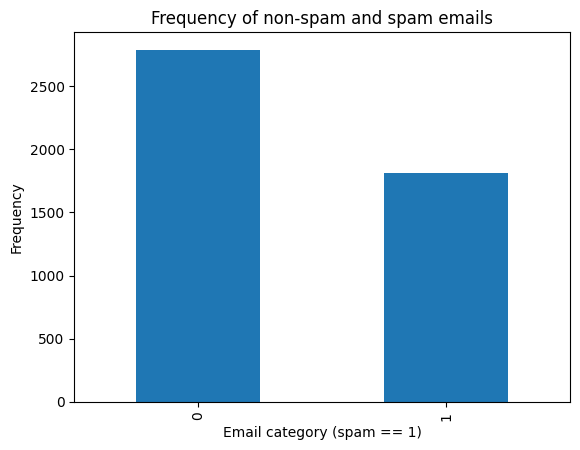

In [88]:
# Plot the frequency of spam and non-spam emails in this database
spam_email_df["spam, non-spam classes"].value_counts().plot(
    kind="bar",
    title="Frequency of non-spam and spam emails",
    ylabel="Frequency",
    xlabel="Email category (spam == 1)",
)

Text(0, 0.5, 'Mean frequency across all emails')

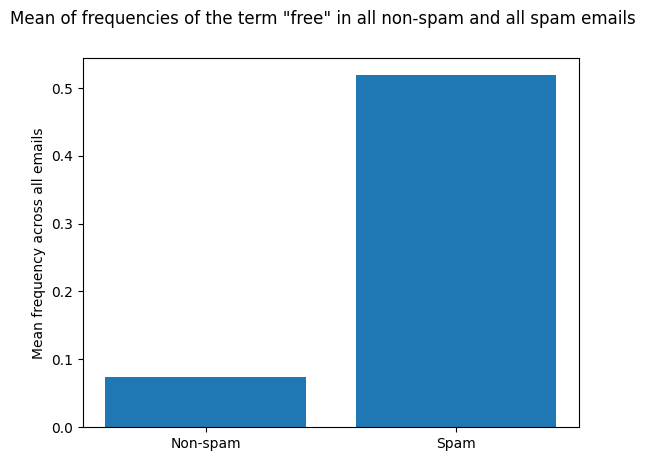

In [89]:
# Plot the relative frequencies of the word 'free' in non-spam and spam emails.

free_freq_bar_plot_names = ["Non-spam", "Spam"]
free_freq_bar_plot_mean_values = [
    spam_email_df.loc[spam_email_df["spam, non-spam classes"] == 0][
        "word_freq_free"
    ].mean(),
    spam_email_df.loc[spam_email_df["spam, non-spam classes"] == 1][
        "word_freq_free"
    ].mean(),
]

plt.bar(x=free_freq_bar_plot_names, height=free_freq_bar_plot_mean_values)
plt.suptitle(
    'Mean of frequencies of the term "free" in all non-spam and all spam emails'
)
plt.ylabel("Mean frequency across all emails")

word_freq_george    Axes(0.125,0.11;0.775x0.77)
dtype: object

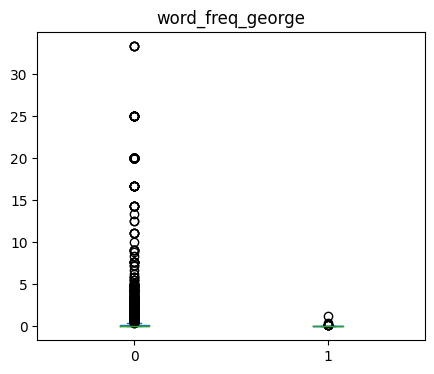

In [124]:
# Bivariate analysis
spam_email_df.plot(column = 'word_freq_george', by = 'spam, non-spam classes', kind = 'box', subplots = False, xlabel = 'Is spam', figsize = (5, 4))

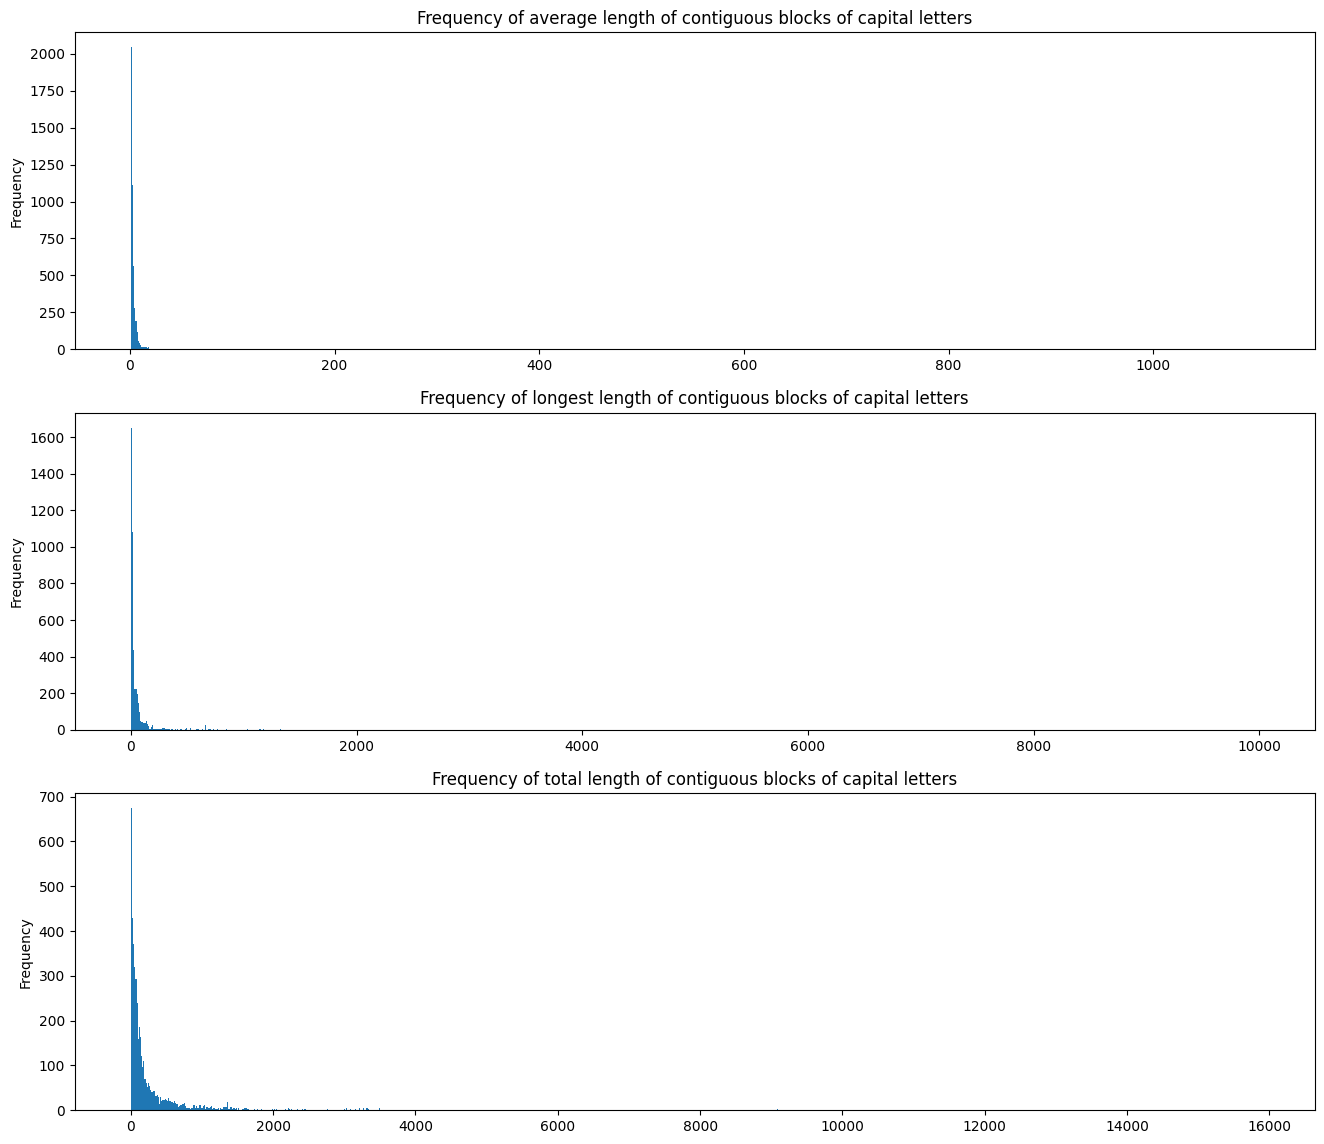

In [90]:
# Check the distributions of the capital run variables
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16, 14))

# The capital run length values are heavily skewed to the right, as the vast majority of emails do not have any runs of capital letters.
spam_email_df["capital_run_length_average"].plot(
    kind="hist",
    bins=1000,
    ax=axes[0],
    title="Frequency of average length of contiguous blocks of capital letters",
)
spam_email_df["capital_run_length_longest"].plot(
    kind="hist",
    bins=1000,
    ax=axes[1],
    title="Frequency of longest length of contiguous blocks of capital letters",
)
spam_email_df["capital_run_length_total"].plot(
    kind="hist",
    bins=1000,
    ax=axes[2],
    title="Frequency of total length of contiguous blocks of capital letters",
)
plt.show()

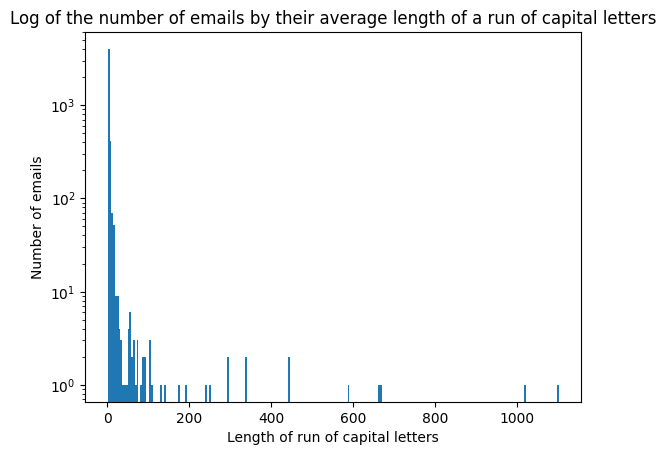

In [91]:
# Take the log of the average length of a run of capital letters
fig, axes = plt.subplots(nrows=1, ncols=1)

# The capital run length values are heavily skewed to the right, as the
# vast majority of emails do not have any runs of capital letters.
spam_email_df["capital_run_length_average"].plot(
    kind="hist",
    bins=250,
    ax=axes,
    title="Log of the number of emails by their average length of a run of capital letters",
)
axes.set_yscale("log")
axes.set_ylabel("Number of emails")
axes.set_xlabel("Length of run of capital letters")
plt.show()

In [92]:
# Look for the highest correlations.
# There are lots of correlation values. The below is limited to correlations greater than 0.4
# and presents those correlations as a list rather than the full correlation table.

table_of_correlations = (
    spam_email_df.corr()
    .where(np.triu(np.ones(spam_email_df.corr().shape), k=1).astype(bool))
    .abs()
    .stack()
    .reset_index()
)
table_of_correlations.columns = ["First_var", "Second_var", "Correlation"]
table_of_correlations.loc[
    (table_of_correlations["First_var"] != table_of_correlations["Second_var"])
    & (table_of_correlations["Correlation"].notnull())
    & (table_of_correlations["Correlation"] > 0.6)
].sort_values(by="Correlation", ascending=False).style.background_gradient(cmap="BuPu")

,First_var,Second_var,Correlation
1303,word_freq_857,word_freq_415,0.996066
1309,word_freq_857,word_freq_direct,0.848021
1358,word_freq_415,word_freq_direct,0.845359
1275,word_freq_telnet,word_freq_857,0.737555
1277,word_freq_telnet,word_freq_415,0.735187
1305,word_freq_857,word_freq_technology,0.729750
1354,word_freq_415,word_freq_technology,0.727119
1283,word_freq_telnet,word_freq_direct,0.699918
1279,word_freq_telnet,word_freq_technology,0.677790
1403,word_freq_technology,word_freq_direct,0.674249


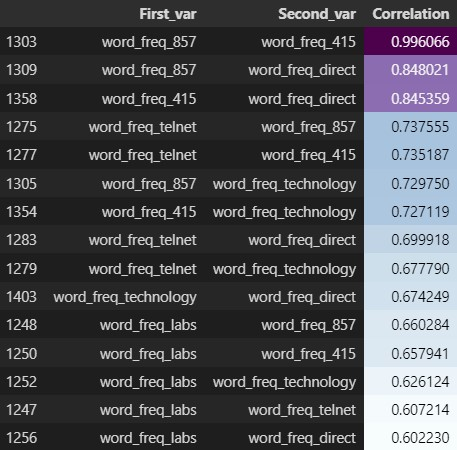

In [93]:
from IPython.display import Image
from IPython.core.display import HTML

Image("./corr_table.jpg")

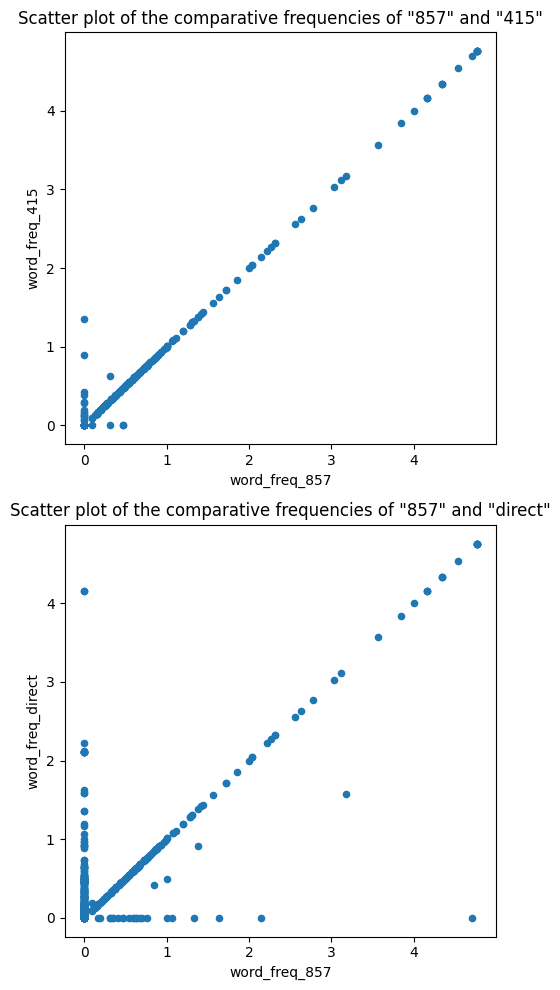

In [94]:
# Scatter plots to check the distribution of highly-correlated variables.
high_corr_scatter_figs, high_corr_scatter_axes = plt.subplots(
    nrows=2, ncols=1, figsize=(5, 10)
)

# Plot the two top correlations.
spam_email_df.plot.scatter(
    x="word_freq_857",
    y="word_freq_415",
    title='Scatter plot of the comparative frequencies of "857" and "415"',
    ax=high_corr_scatter_axes[0],
)

spam_email_df.plot.scatter(
    x="word_freq_857",
    y="word_freq_direct",
    title='Scatter plot of the comparative frequencies of "857" and "direct"',
    ax=high_corr_scatter_axes[1],
)

plt.tight_layout()

In [ ]:
"""Data preprocessing"""

In [95]:
x_reduced_vars = spam_email_df.drop(
    [
        "word_freq_george",
        "word_freq_650",
        "capital_run_length_longest",
        "capital_run_length_total",
        "spam, non-spam classes",
    ],
    axis=1,
    inplace=False,
)

y = spam_email_df["spam, non-spam classes"]

In [108]:
# Standardise the average capital run length variable
from sklearn.preprocessing import MinMaxScaler

x_reduced_vars[["capital_run_length_average"]] = MinMaxScaler(
    feature_range=(0, 1)
).fit_transform(x_reduced_vars[["capital_run_length_average"]])
x_reduced_vars

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,0.002502
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,0.003735
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,0.008008
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,0.002303
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,0.002303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,0.000129
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,0.000504
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,0.000367
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,0.000133


In [109]:
# Source: ECS784P Week 5 lab
# Calculation of the chi-squared values
chi2_values = SelectKBest(score_func=chi2, k="all").fit(x_reduced_vars, y)
chi2_sorted = pd.Series(
    data=chi2_values.scores_, index=x_reduced_vars.columns
).sort_values()

In [110]:
# The chi-square list was reversed, in order to be used in the create_list_of_accuracy_scores function
rev_chi2_list = list(chi2_sorted.index)
rev_chi2_list.reverse()
rev_chi2_list

['word_freq_hp',
 'word_freq_your',
 'word_freq_free',
 'word_freq_hpl',
 'word_freq_remove',
 'char_freq_!',
 'word_freq_you',
 'word_freq_000',
 'word_freq_credit',
 'word_freq_edu',
 'word_freq_3d',
 'word_freq_money',
 'word_freq_business',
 'word_freq_our',
 'char_freq_$',
 'word_freq_meeting',
 'word_freq_font',
 'word_freq_re',
 'word_freq_internet',
 'word_freq_email',
 'word_freq_lab',
 'word_freq_85',
 'word_freq_labs',
 'word_freq_addresses',
 'word_freq_order',
 'word_freq_data',
 'word_freq_project',
 'word_freq_over',
 'word_freq_1999',
 'word_freq_telnet',
 'word_freq_receive',
 'word_freq_pm',
 'word_freq_all',
 'word_freq_mail',
 'word_freq_technology',
 'word_freq_857',
 'word_freq_415',
 'word_freq_cs',
 'word_freq_original',
 'word_freq_conference',
 'char_freq_#',
 'word_freq_people',
 'word_freq_make',
 'word_freq_direct',
 'word_freq_address',
 'word_freq_report',
 'char_freq_;',
 'char_freq_(',
 'word_freq_parts',
 'char_freq_[',
 'capital_run_length_average',
 

In [ ]:
"""Feature Selection"""

In [111]:
# A function to calculate the cross-validation scores of the model passed in.
# This returns a list of tuples, containing the mean score and standard deviation
# of each cross validation scores.
def create_list_of_accuracy_scores(model, list_of_var_names, x_in, y_in):
    list_of_cv_accuracy_score_means_and_vars = []

    # This is limited to '20' features both to allow for
    for i in range(1, min(20, len(list_of_var_names) - 1)):
        latest_score = cross_val_score(
            model, x_in[list_of_var_names[:i]], y_in, cv=5, scoring="accuracy"
        )
        list_of_cv_accuracy_score_means_and_vars.append(
            (np.mean(latest_score), np.std(latest_score))
        )

    return list_of_cv_accuracy_score_means_and_vars

In [112]:
# Calculate a list of cv tuples for the logistic regression algorithm
logistic_reg_cv_accuracy_scores = create_list_of_accuracy_scores(
    LogisticRegression(), rev_chi2_list, x_reduced_vars, y
)

In [113]:
# Put the mean cv scores for logistic regression into a pandas dataframe
logistic_cv_accuracy_vals = pd.DataFrame(columns=["Num_vars", "Mean_accuracy"])
logistic_cv_accuracy_vals["Num_vars"] = [
    i for i in range(2, len(logistic_reg_cv_accuracy_scores) + 2)
]
logistic_cv_accuracy_vals["Mean_accuracy"] = [
    i[0] for i in logistic_reg_cv_accuracy_scores
]

<Axes: title={'center': 'Mean accuracy of Logistic model as variables added'}, xlabel='Number of variables', ylabel='Mean accuracy'>

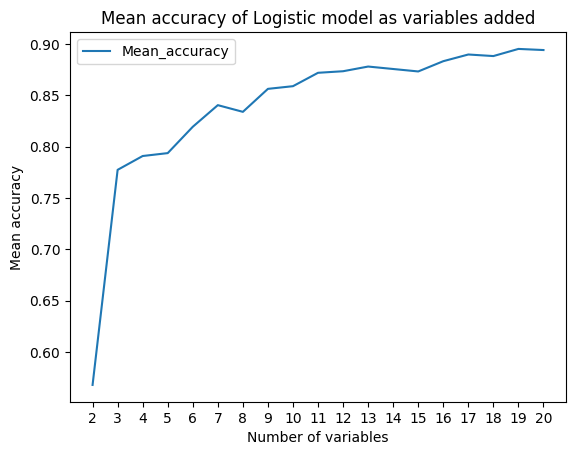

In [114]:
# Plot the mean cv scores for logistic regression
logistic_cv_accuracy_vals.plot(
    x="Num_vars",
    y="Mean_accuracy",
    title="Mean accuracy of Logistic model as variables added",
    xlabel="Number of variables",
    ylabel="Mean accuracy",
    xticks=[i for i in range(2, len(logistic_reg_cv_accuracy_scores) + 2)],
)

In [115]:
# Calculate a list of cv tuples for the support vector classifier algorithm
svm_reg_accuracy_scores = create_list_of_accuracy_scores(
    SVC(kernel="rbf"), rev_chi2_list, x_reduced_vars, y
)

In [116]:
# Put the mean cv scores for the support vector classifier into a pandas dataframe
svm_accuracy_vals = pd.DataFrame(columns=["Num_vars", "Mean_accuracy"])
svm_accuracy_vals["Num_vars"] = [i for i in range(2, len(svm_reg_accuracy_scores) + 2)]
svm_accuracy_vals["Mean_accuracy"] = [i[0] for i in svm_reg_accuracy_scores]

<Axes: title={'center': 'Mean accuracy of SVM model as variables added'}, xlabel='Number of variables', ylabel='Mean cross-validation accuracy'>

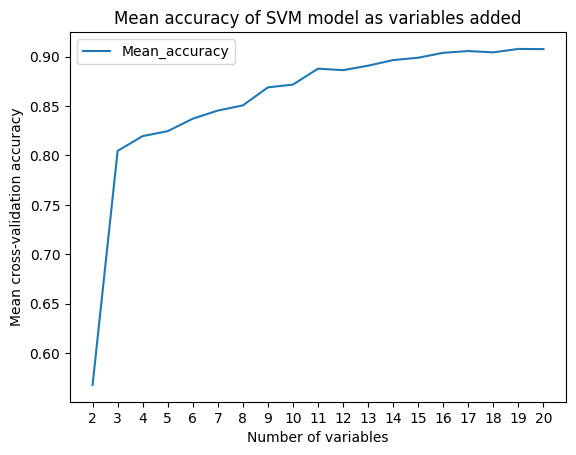

In [117]:
# Plot the mean cv scores for the support vector classifier
svm_accuracy_vals.plot(
    x="Num_vars",
    y="Mean_accuracy",
    title="Mean accuracy of SVM model as variables added",
    xlabel="Number of variables",
    ylabel="Mean cross-validation accuracy",
    xticks=[i for i in range(2, len(svm_reg_accuracy_scores) + 2)],
)

In [ ]:
"""Train and Test Models"""

In [ ]:
# Source: ECS784P Week 5 lab
# Function to train and test a model, producing a confusion matrix and returning
# the learnt model.

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
)


def train_and_evaluate(model, X, y, model_name_string):

    print("\nResults from algorithm {}:".format(model))

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    print(
        "Mean cross-validation accuracy is {:.3f} with SD {:.3f}".format(
            np.mean(scores), np.std(scores)
        )
    )

    learnt_model = model.fit(X_train, y_train)
    print(
        "\nAccuracy on training data is {:.3f}\n".format(model.score(X_train, y_train))
    )

    y_pred = model.predict(X_test)
    print(
        "Test data metrics: accuracy={:.3f}, f1={:.3f}, precision={:.3f}, recall={:.3f}".format(
            accuracy_score(y_true=y_test, y_pred=y_pred),
            f1_score(y_true=y_test, y_pred=y_pred),
            precision_score(y_true=y_test, y_pred=y_pred),
            recall_score(y_true=y_test, y_pred=y_pred),
        )
    )

    cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
    plt.figure(figsize=(4, 4))
    ax = sns.heatmap(
        cm,
        annot=True,
        xticklabels=["N", "Y"],
        cbar=False,
        yticklabels=["N", "Y"],
        square=True,
        linewidths=8.0,
        fmt="g",
    )
    ax.set_xlabel("Predicted Spam Status")
    ax.set_ylabel("Actual Spam Status")
    ax.set_title(f"Confusion matrix of {model_name_string} model spam predictions")
    plt.show()

    return learnt_model


Results from algorithm LogisticRegression():
Mean cross-validation accuracy is 0.842 with SD 0.007

Accuracy on training data is 0.843

Test data metrics: accuracy=0.851, f1=0.805, precision=0.904, recall=0.726


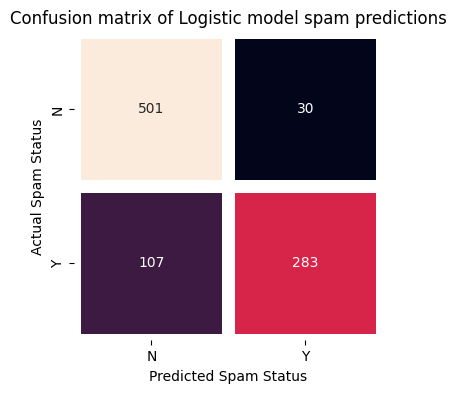

In [121]:
# Train and evaluate the logistic model with eight features
learnt_logistic_model = train_and_evaluate(
    LogisticRegression(), x_reduced_vars[rev_chi2_list[0:7]], y, "Logistic"
)


Results from algorithm SVC():
Mean cross-validation accuracy is 0.891 with SD 0.008

Accuracy on training data is 0.898

Test data metrics: accuracy=0.893, f1=0.866, precision=0.915, recall=0.823


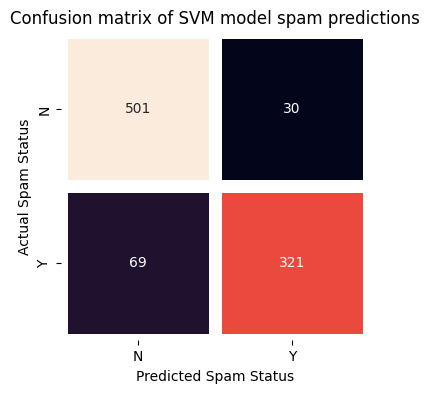

In [123]:
# Train and evaluate the support vector classifier with eight features
learnt_svm_model = train_and_evaluate(
    SVC(kernel="rbf"), x_reduced_vars[rev_chi2_list[0:11]], y, "SVM"
)